# Q2

In [1]:
import cv2 # just for reading the image
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

read image "q2.png"

In [4]:
img = cv2.imread('q2.png', cv2.IMREAD_COLOR)

plot the image

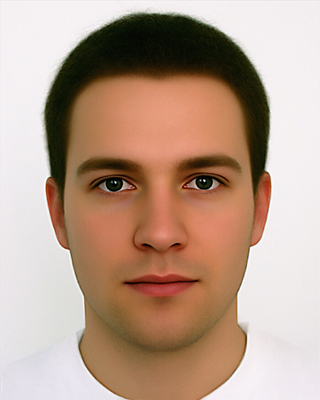

In [5]:
cv2_imshow(img)

In [36]:
def segment(image,seed_point,threshold,neighbor_mode=0):
    ### neighbor_mode=0 => 4-connectivity
    ### neighbor_mode=1 => 8-connectivity
    ### YOUR CODE HERE
    segmented_image = image.copy()
    queue = [seed_point]
    rows, cols = image.shape[:2]
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)] if neighbor_mode == 0 else [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
    segmented_image[seed_point[0], seed_point[1], :] = [0, 0, 255]

    while len(queue) != 0:
        x, y = queue.pop(0)

        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols:
                mean = np.mean(np.abs(image[nx, ny].astype('int32') - image[x, y].astype('int32')))
                if mean <= threshold and all(segmented_image[nx, ny, :].astype('int32') != [0, 0, 255]):
                    queue.append((nx, ny))
                    segmented_image[nx, ny, :] = [0, 0, 255]

    return segmented_image

In [75]:
seed_point=(230, 230)
threshold=3.5

In [76]:
segmented_image_4 = segment(img, seed_point, threshold)
segmented_image_8 = segment(img, seed_point, threshold, 1)

In [79]:
segmented_4_images = []
segmented_8_images = []
segmented_images = []

for threshold in [1, 2, 3.5, 5]:
    segmented_images.append(np.concatenate((segment(img, seed_point, threshold),
                                     segment(img, seed_point, threshold, 1)), axis=1))

plot the results and compare them

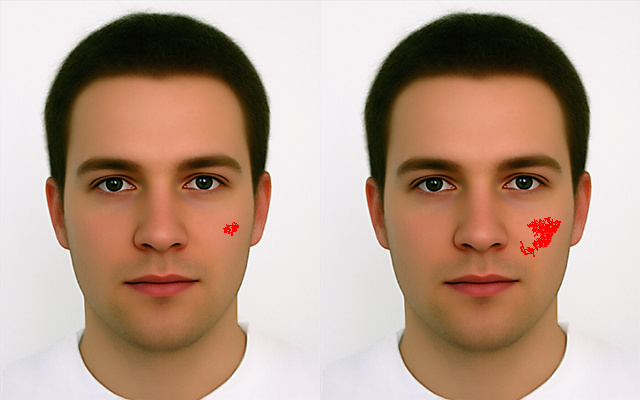

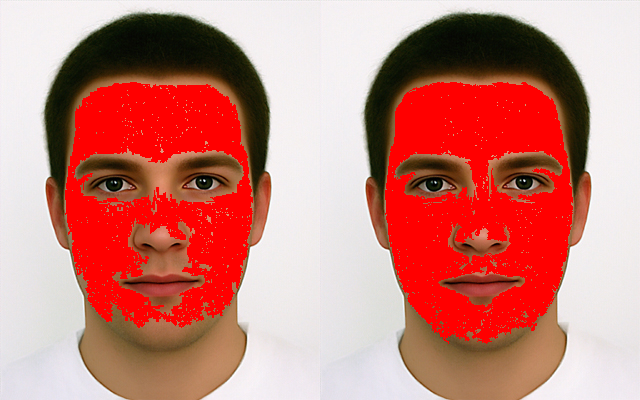

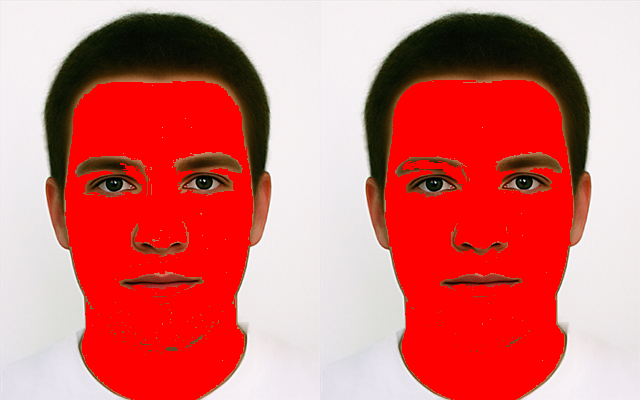

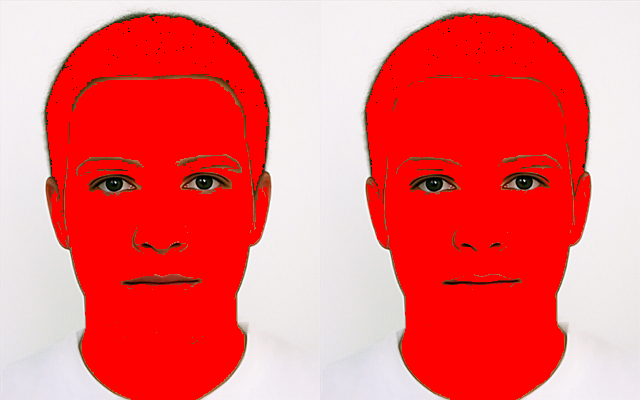

In [82]:
for s_i in segmented_images:
    cv2_imshow(s_i)